In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from matplotlib.patches import ConnectionPatch

In [2]:
url_2017 = 'https://api.tfl.gov.uk/AccidentStats/2017'

In [3]:
req_2017 = requests.get(url_2017)

In [4]:
req_2017

<Response [200]>

In [5]:
json_2017_data = req_2017.json()

In [6]:
json_2017_data

[{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities',
  'id': 295277,
  'lat': 51.53788,
  'lon': -0.184772,
  'location': 'Abbey Road junction with Boundary Road',
  'date': '2017-03-03T07:00:00Z',
  'severity': 'Serious',
  'borough': 'Camden',
  'casualties': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities',
    'age': 52,
    'class': 'Driver',
    'severity': 'Serious',
    'mode': 'PedalCycle',
    'ageBand': 'Adult'}],
  'vehicles': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
    'type': 'Taxi'},
   {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
    'type': 'PedalCycle'}]},
 {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities',
  'id': 295278,
  'lat': 51.542421,
  'lon': -0.147385,
  'location': 'Chalk Farm Road 20 metres north of ju

In [7]:
json_2017_data[0].keys()

dict_keys(['$type', 'id', 'lat', 'lon', 'location', 'date', 'severity', 'borough', 'casualties', 'vehicles'])

# 2017 DataFrame

In [8]:
df_2017 = pd.DataFrame(json_2017_data, columns=['id', 'location', 'date', 'severity', 'borough'])
df_2017

id                                           location  \
0      295277             Abbey Road junction with Boundary Road   
1      295278  Chalk Farm Road 20 metres north of junction wi...   
2      295279     Primrose Hill Road junction with Adelaide Road   
3      295280     Kilburn High Road junction with Kilburn Priory   
4      295281      Gray's Inn Road junction with Baldwin Gardens   
...       ...                                                ...   
54173  297884  Homerton High Street 20 metres west of junctio...   
54174  297885   Woodberry Grove junction with Seven Sisters Road   
54175  297886       Woodberry Grove junction with Woodberry Down   
54176  297887  Victoria Park Road junction with Victoria Park...   
54177  297888  Homerton High Street junction with Shepherds Lane   

                       date severity  borough  
0      2017-03-03T07:00:00Z  Serious   Camden  
1      2017-02-25T22:49:00Z   Slight   Camden  
2      2017-03-02T18:15:00Z   Slight   Camden  
3      2017-03-04T00:29:00Z   Slight   Camden  
4      2017-03-03T13:35:00Z   Slight   Camden  
...                     ...      ...      ...  
54173  2017-12-26T22:30:00Z   Slight  Hackney  
54174  2017-12-27T18:15:00Z  Serious  Hackney  
54175  2017-12-27T16:12:00Z   Slight  Hackney  
54176  2017-12-27T18:40:00Z   Slight  Hackney  
54177  2017-12-28T18:24:00Z   Slight  Hackney  

[54178 rows x 5 columns]

In [9]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54178 entries, 0 to 54177
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        54178 non-null  int64 
 1   location  54178 non-null  object
 2   date      54178 non-null  object
 3   severity  54178 non-null  object
 4   borough   54178 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [10]:
df_2017.describe()

id
count   54178.000000
mean   492216.000000
std    185736.406806
min    293102.000000
25%    306646.250000
50%    492216.000000
75%    677785.750000
max    691330.000000

In [11]:
df_2017.duplicated().sum()

0

In [12]:
df_2017.loc[0, 'date']

'2017-03-03T07:00:00Z'

In [13]:
df_2017['date'] = pd.to_datetime(df_2017['date'])

In [14]:
df_2017

id                                           location  \
0      295277             Abbey Road junction with Boundary Road   
1      295278  Chalk Farm Road 20 metres north of junction wi...   
2      295279     Primrose Hill Road junction with Adelaide Road   
3      295280     Kilburn High Road junction with Kilburn Priory   
4      295281      Gray's Inn Road junction with Baldwin Gardens   
...       ...                                                ...   
54173  297884  Homerton High Street 20 metres west of junctio...   
54174  297885   Woodberry Grove junction with Seven Sisters Road   
54175  297886       Woodberry Grove junction with Woodberry Down   
54176  297887  Victoria Park Road junction with Victoria Park...   
54177  297888  Homerton High Street junction with Shepherds Lane   

                           date severity  borough  
0     2017-03-03 07:00:00+00:00  Serious   Camden  
1     2017-02-25 22:49:00+00:00   Slight   Camden  
2     2017-03-02 18:15:00+00:00   Slight   Camden  
3     2017-03-04 00:29:00+00:00   Slight   Camden  
4     2017-03-03 13:35:00+00:00   Slight   Camden  
...                         ...      ...      ...  
54173 2017-12-26 22:30:00+00:00   Slight  Hackney  
54174 2017-12-27 18:15:00+00:00  Serious  Hackney  
54175 2017-12-27 16:12:00+00:00   Slight  Hackney  
54176 2017-12-27 18:40:00+00:00   Slight  Hackney  
54177 2017-12-28 18:24:00+00:00   Slight  Hackney  

[54178 rows x 5 columns]

In [15]:
df_2017.loc[0, 'date'].day_name()

'Friday'

In [16]:
df_2017['date'].dt.day_name()

0           Friday
1         Saturday
2         Thursday
3         Saturday
4           Friday
           ...    
54173      Tuesday
54174    Wednesday
54175    Wednesday
54176    Wednesday
54177     Thursday
Name: date, Length: 54178, dtype: object

In [17]:
df_2017['dayofweek'] = df_2017['date'].dt.day_name()

In [18]:
df_2017

id                                           location  \
0      295277             Abbey Road junction with Boundary Road   
1      295278  Chalk Farm Road 20 metres north of junction wi...   
2      295279     Primrose Hill Road junction with Adelaide Road   
3      295280     Kilburn High Road junction with Kilburn Priory   
4      295281      Gray's Inn Road junction with Baldwin Gardens   
...       ...                                                ...   
54173  297884  Homerton High Street 20 metres west of junctio...   
54174  297885   Woodberry Grove junction with Seven Sisters Road   
54175  297886       Woodberry Grove junction with Woodberry Down   
54176  297887  Victoria Park Road junction with Victoria Park...   
54177  297888  Homerton High Street junction with Shepherds Lane   

                           date severity  borough  dayofweek  
0     2017-03-03 07:00:00+00:00  Serious   Camden     Friday  
1     2017-02-25 22:49:00+00:00   Slight   Camden   Saturday  
2     2017-03-02 18:15:00+00:00   Slight   Camden   Thursday  
3     2017-03-04 00:29:00+00:00   Slight   Camden   Saturday  
4     2017-03-03 13:35:00+00:00   Slight   Camden     Friday  
...                         ...      ...      ...        ...  
54173 2017-12-26 22:30:00+00:00   Slight  Hackney    Tuesday  
54174 2017-12-27 18:15:00+00:00  Serious  Hackney  Wednesday  
54175 2017-12-27 16:12:00+00:00   Slight  Hackney  Wednesday  
54176 2017-12-27 18:40:00+00:00   Slight  Hackney  Wednesday  
54177 2017-12-28 18:24:00+00:00   Slight  Hackney   Thursday  

[54178 rows x 6 columns]

                                             |      | [  0%]   00:00 -> (? left)


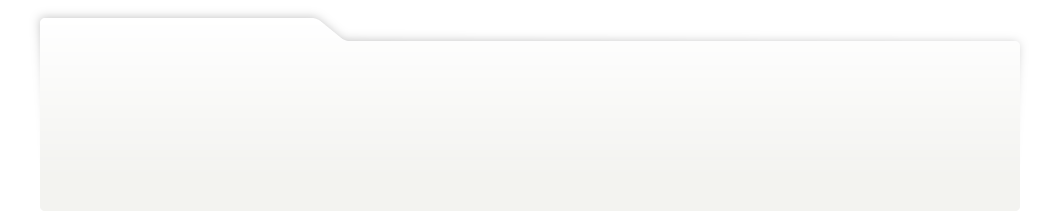
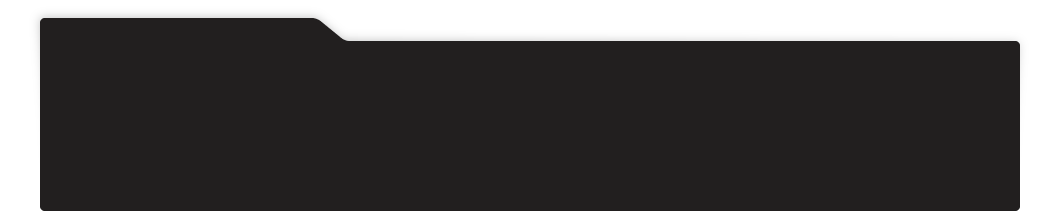
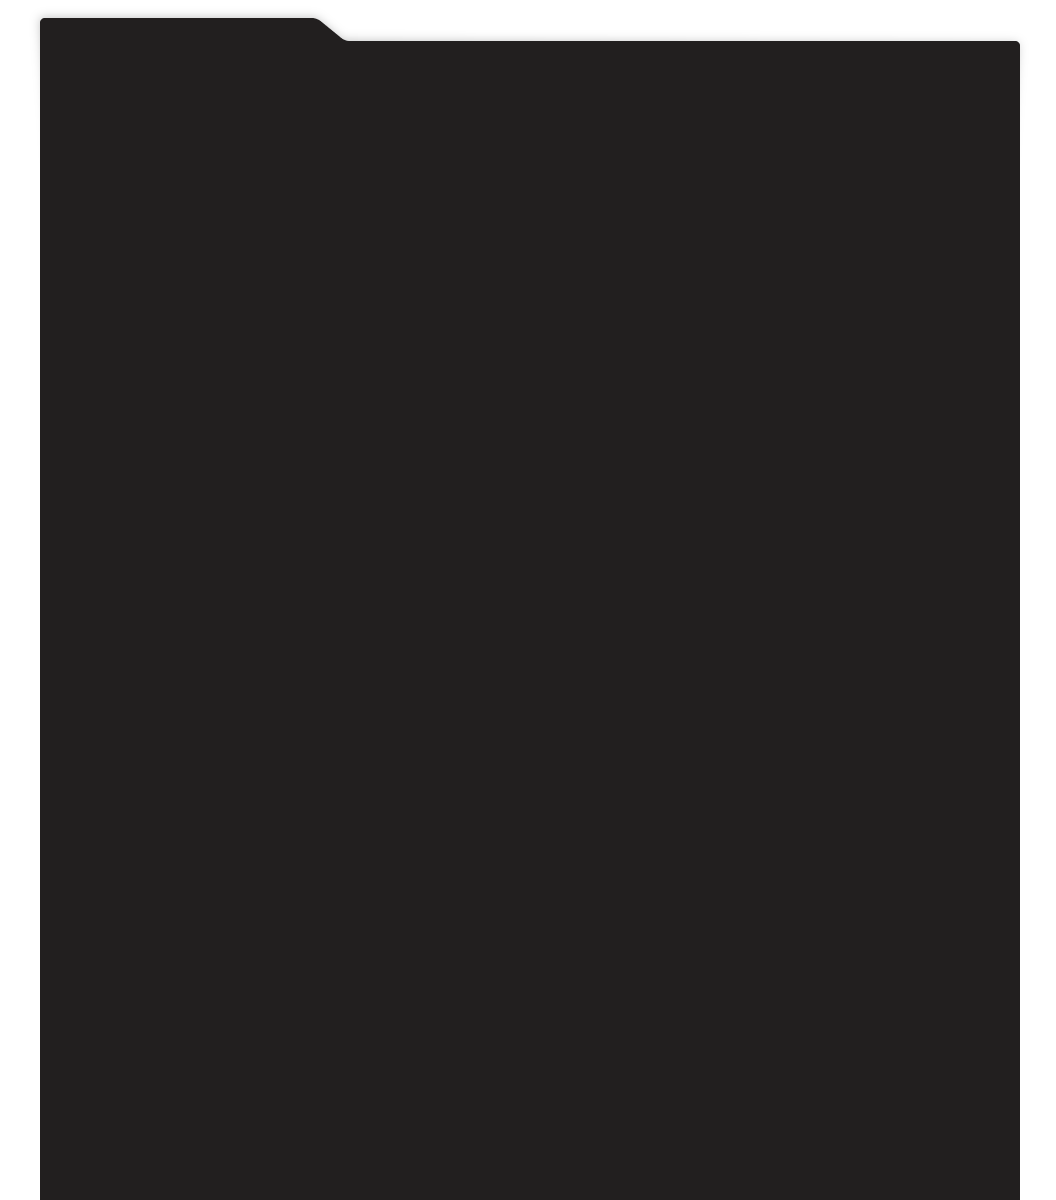
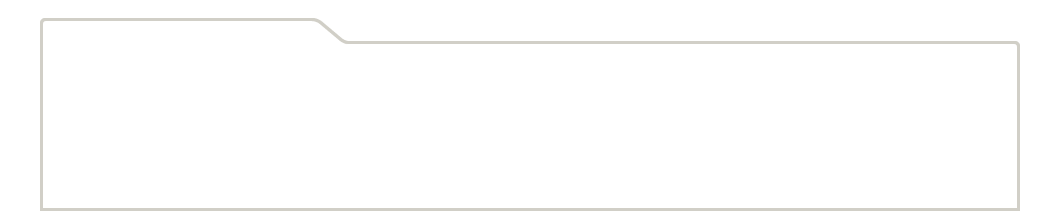
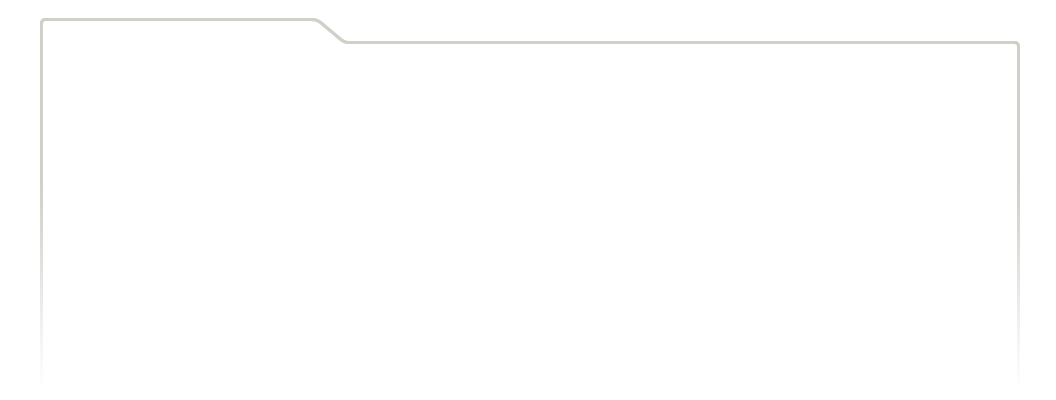
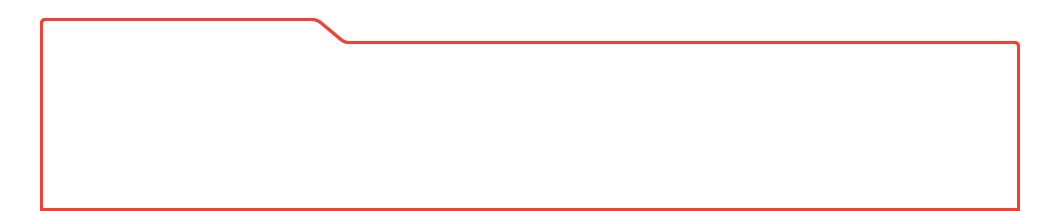
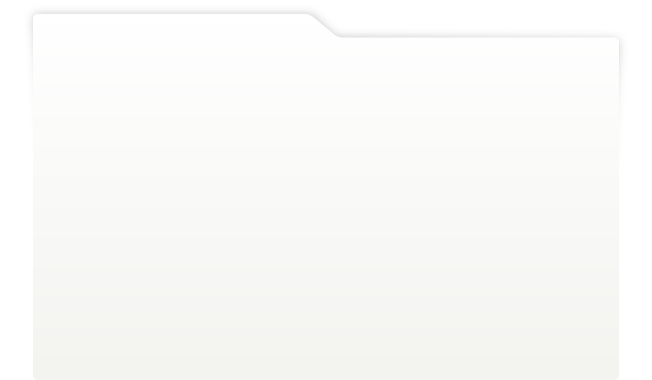
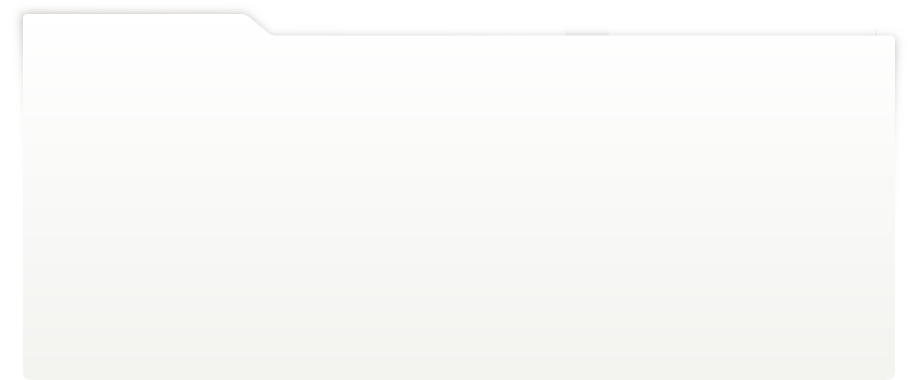
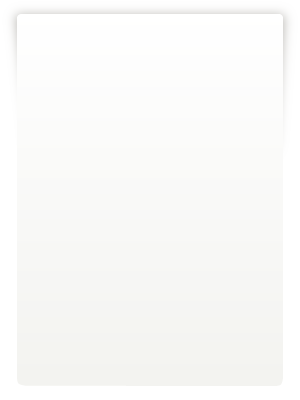
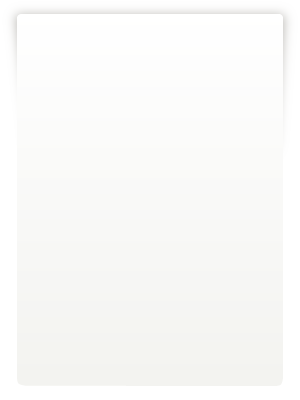
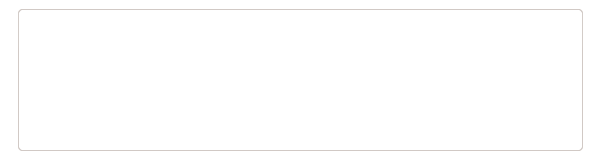
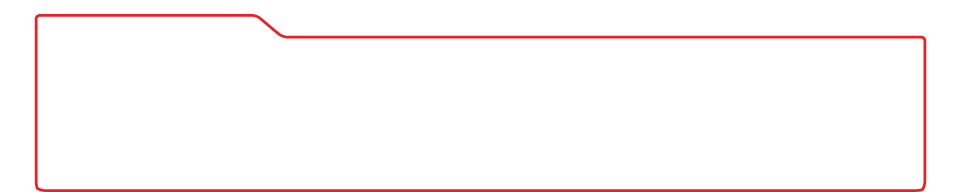
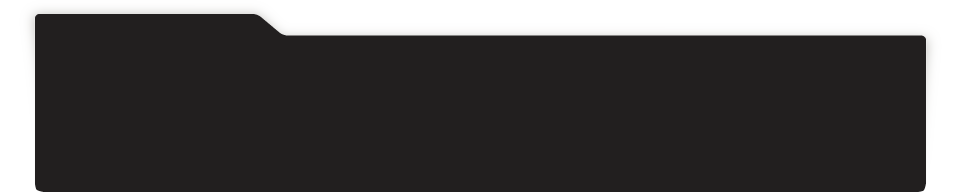
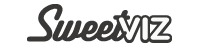
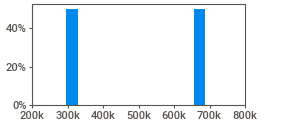
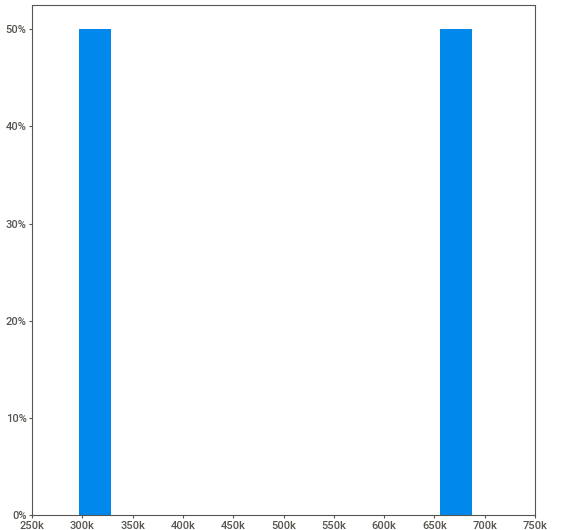
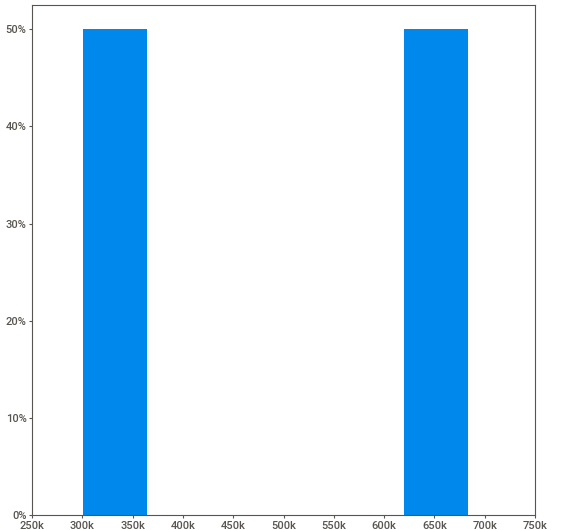
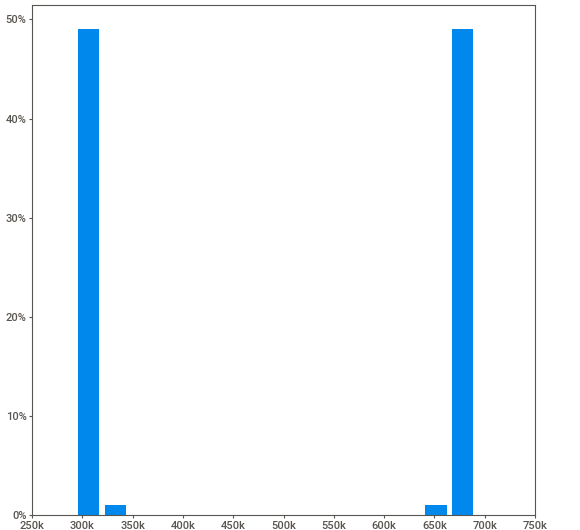
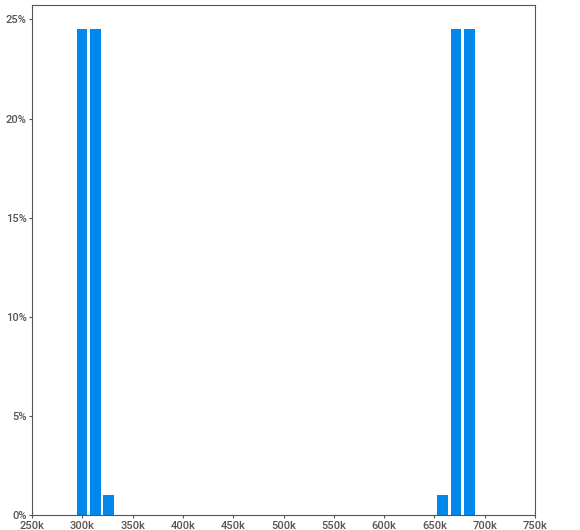
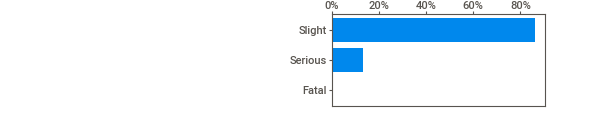
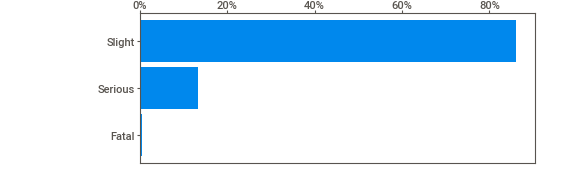
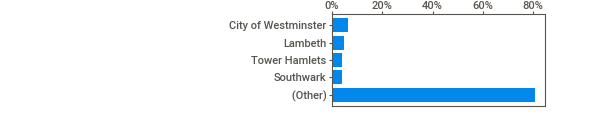
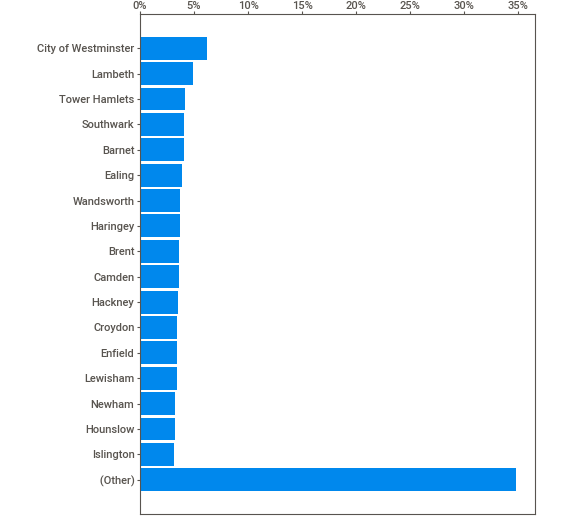
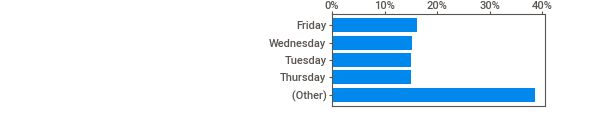
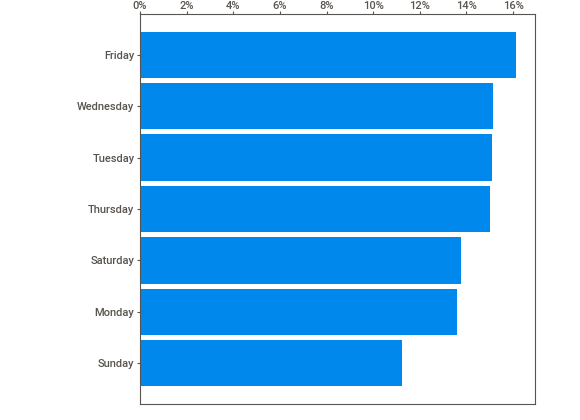
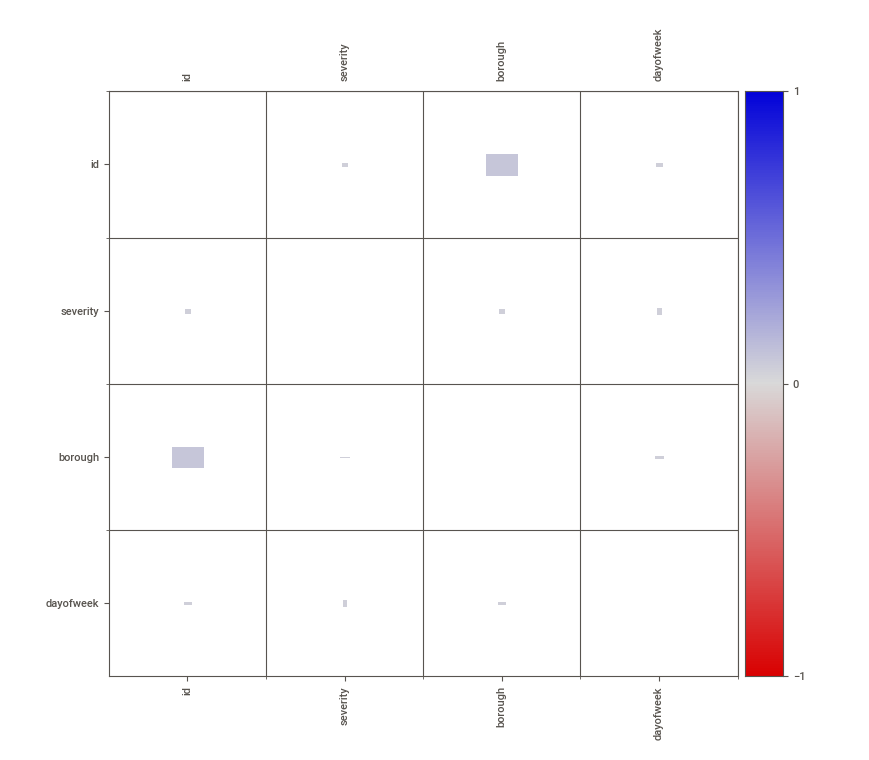
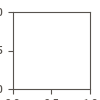

In [100]:
my_report_2017 = sv.analyze(df_2017)
my_report_2017.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Total Accidents Recorded

# Proportion of accidents by severity

In [20]:
df_2017['severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [21]:
fatal_mean_2017 = (df_2017['severity'] == 'Fatal').mean()
fatal_mean_2017

0.004835911255491159

In [22]:
serious_mean_2017 = (df_2017['severity'] == 'Serious').mean()
serious_mean_2017

0.13370740891136623

In [23]:
slight_mean_2017 = (df_2017['severity'] == 'Slight').mean()
slight_mean_2017

0.8614566798331426

In [24]:
severity_ratios_2017 = [fatal_mean_2017, serious_mean_2017, slight_mean_2017]
severity_ratios_2017

[0.004835911255491159, 0.13370740891136623, 0.8614566798331426]

# Counts of accidents per borough

In [25]:
accidents_by_borough_2017 = df_2017['borough'].value_counts().rename_axis('accidents_by_borough').to_frame('counts')
accidents_by_borough_2017

counts
accidents_by_borough          
City of Westminster       3378
Lambeth                   2678
Tower Hamlets             2248
Southwark                 2198
Barnet                    2190
Ealing                    2088
Wandsworth                2006
Haringey                  1986
Brent                     1948
Camden                    1936
Hackney                   1904
Croydon                   1878
Enfield                   1864
Lewisham                  1830
Newham                    1736
Hounslow                  1732
Islington                 1722
Bromley                   1660
Greenwich                 1588
Redbridge                 1584
Hillingdon                1526
Kensington and Chelsea    1398
Waltham Forest            1362
Hammersmith and Fulham    1352
Barking and Dagenham      1266
Havering                  1154
Merton                     990
Bexley                     960
Richmond upon Thames       884
Sutton                     868
Harrow                     866
Kingston                   742
City of London             656

# Fatal accidents by borough 

In [26]:
fatal_2017 = df_2017[df_2017['severity'] == 'Fatal']
fatal_2017

id                                           location  \
69     293108  Mansell Street 50 metres south of junction wit...   
229    300445  Mayow Road 25 metres south of junction with De...   
425    297951  The Highway 30 metres west of junction with Ki...   
446    297972   White Church Lane junction with Whitechapel Road   
448    297974        Commercial Road junction with Pitsea Street   
...       ...                                                ...   
52954  296665  Camden Road 20 metres west of junction with Hi...   
52995  296706             City Road junction with westland Place   
53984  297695          Green Lanes junction with Woodberry Grove   
53989  297700  Lea Bridge Road 15 metres south of junction wi...   
54076  297787  Upper Clapton Road 25 metres north of junction...   

                           date severity         borough  dayofweek  
69    2017-04-25 22:27:00+00:00    Fatal  City of London    Tuesday  
229   2017-09-23 00:36:00+00:00    Fatal        Lewisham   Saturday  
425   2017-01-24 09:25:00+00:00    Fatal   Tower Hamlets    Tuesday  
446   2017-02-06 08:55:00+00:00    Fatal   Tower Hamlets     Monday  
448   2017-02-06 09:14:00+00:00    Fatal   Tower Hamlets     Monday  
...                         ...      ...             ...        ...  
52954 2017-08-29 05:50:00+00:00    Fatal       Islington    Tuesday  
52995 2017-09-18 12:10:00+00:00    Fatal       Islington     Monday  
53984 2017-10-22 11:00:00+00:00    Fatal         Hackney     Sunday  
53989 2017-10-23 13:30:00+00:00    Fatal         Hackney     Monday  
54076 2017-11-22 10:43:00+00:00    Fatal         Hackney  Wednesday  

[262 rows x 6 columns]

In [27]:
fatal_accident_2017 = fatal_2017.groupby('borough').count()['severity'].rename_axis('Fatal_accident_per_borough').to_frame('Total')
fatal_accident_2017

Total
Fatal_accident_per_borough       
Barking and Dagenham            6
Barnet                         16
Bexley                          4
Brent                          12
Bromley                         4
Camden                          8
City of London                  4
City of Westminster            12
Croydon                        10
Ealing                         14
Enfield                        20
Greenwich                       6
Hackney                         6
Hammersmith and Fulham          4
Haringey                        6
Harrow                          4
Havering                        8
Hillingdon                      6
Hounslow                        4
Islington                       6
Kensington and Chelsea         12
Kingston                        2
Lambeth                        10
Lewisham                       14
Newham                          4
Redbridge                      18
Richmond upon Thames            6
Southwark                       6
Sutton                          2
Tower Hamlets                  12
Waltham Forest                  8
Wandsworth                      8

In [28]:
fatal_accident_2017 = fatal_accident_2017.sort_values(by='Total', ascending=False)
fatal_accident_2017 = fatal_accident_2017[:5]

In [29]:
fatal_accident_2017

Total
Fatal_accident_per_borough       
Enfield                        20
Redbridge                      18
Barnet                         16
Lewisham                       14
Ealing                         14

In [30]:
first_borough_2017 = (fatal_2017['borough'] == 'Enfield').mean()
first_borough_2017

0.07633587786259542

In [31]:
second_borough_2017 = (fatal_2017['borough'] == 'Redbridge').mean()
second_borough_2017

0.06870229007633588

In [32]:
third_borough_2017 = (fatal_2017['borough'] == 'Barnet').mean()
third_borough_2017

0.061068702290076333

In [33]:
fourth_borough_2017 = (fatal_2017['borough'] == 'Lewisham').mean()
fourth_borough_2017

0.05343511450381679

In [34]:
fifth_borough_2017 = (fatal_2017['borough'] == 'Ealing').mean()
fifth_borough_2017

0.05343511450381679

In [35]:
fatal_ratios_2017 = [first_borough_2017, second_borough_2017, third_borough_2017, fourth_borough_2017, fifth_borough_2017]
fatal_ratios_2017

[0.07633587786259542,
 0.06870229007633588,
 0.061068702290076333,
 0.05343511450381679,
 0.05343511450381679]

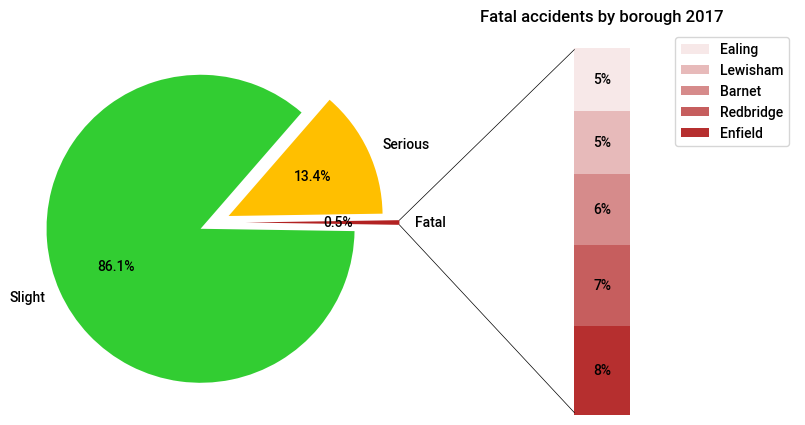

In [47]:
# make figure and assign axis objects

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters

severity_ratios_2017 = severity_ratios_2017
severity_labels_2017 = ['Fatal', 'Serious', 'Slight']
explode = [0.2, 0.1, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * severity_ratios_2017[0]
wedges, *_ = ax1.pie(severity_ratios_2017, autopct='%1.1f%%', startangle=angle,
                     labels=severity_labels_2017, explode=explode, colors=['firebrick', '#ffbf00', 'limegreen'], 
                     textprops={'fontsize': 10})

# bar chart parameters
fatal_ratios_2017 = fatal_ratios_2017
borough_labels = ['Enfield', 'Redbridge', 'Barnet', 'Lewisham', 'Ealing']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(fatal_ratios_2017, borough_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='firebrick', label=label,
                 alpha=0.1 + 0.21 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Fatal accidents by borough 2017')
ax2.legend(loc='upper right')
ax2.axis('off')
ax2.set_xlim(- 3.5 * width, 3.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(fatal_ratios_2017)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, .999), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(.5)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, .689), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(.5)

plt.show()

# Casualties DataFrame

In [103]:
casualties_df_2017 = pd.json_normalize(json_2017_data, 'casualties', 'id')
casualties_df_2017

$type   age       class  \
0      Tfl.Api.Presentation.Entities.AccidentStats.Ca...  52.0      Driver   
1      Tfl.Api.Presentation.Entities.AccidentStats.Ca...  29.0      Driver   
2      Tfl.Api.Presentation.Entities.AccidentStats.Ca...  31.0  Pedestrian   
3      Tfl.Api.Presentation.Entities.AccidentStats.Ca...  23.0      Driver   
4      Tfl.Api.Presentation.Entities.AccidentStats.Ca...  55.0      Driver   
...                                                  ...   ...         ...   
65129  Tfl.Api.Presentation.Entities.AccidentStats.Ca...  55.0   Passenger   
65130  Tfl.Api.Presentation.Entities.AccidentStats.Ca...  67.0  Pedestrian   
65131  Tfl.Api.Presentation.Entities.AccidentStats.Ca...  23.0      Driver   
65132  Tfl.Api.Presentation.Entities.AccidentStats.Ca...  33.0      Driver   
65133  Tfl.Api.Presentation.Entities.AccidentStats.Ca...  55.0      Driver   

      severity               mode ageBand      id  
0      Serious         PedalCycle   Adult  295277  
1       Slight  PoweredTwoWheeler   Adult  295278  
2       Slight         Pedestrian   Adult  295279  
3       Slight  PoweredTwoWheeler   Adult  295280  
4       Slight         PedalCycle   Adult  295281  
...        ...                ...     ...     ...  
65129   Slight                Car   Adult  297884  
65130  Serious         Pedestrian   Adult  297885  
65131   Slight                Car   Adult  297886  
65132   Slight         PedalCycle   Adult  297887  
65133   Slight                Car   Adult  297888  

[65134 rows x 7 columns]

In [104]:
casualties_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65134 entries, 0 to 65133
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   $type     65134 non-null  object 
 1   age       63862 non-null  float64
 2   class     65134 non-null  object 
 3   severity  65134 non-null  object 
 4   mode      65134 non-null  object 
 5   ageBand   65134 non-null  object 
 6   id        65134 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.5+ MB


In [105]:
casualties_df_2017.describe()

age
count  63862.000000
mean      35.912781
std       16.769515
min        0.000000
25%       24.000000
50%       33.000000
75%       46.000000
max       98.000000

In [106]:
casualties_df_2017.duplicated().sum()

442

In [107]:
casualties_df_2017['mode'].unique()

array(['PedalCycle', 'PoweredTwoWheeler', 'Pedestrian', 'BusOrCoach',
       'Car', 'GoodsVehicle', 'Taxi', 'OtherVehicle'], dtype=object)

In [122]:
casualties_df_2017[(casualties_df_2017['mode'] == 'Car') & (casualties_df_2017['severity'] == 'Fatal')].count()

$type       28
age         28
class       28
severity    28
mode        28
ageBand     28
id          28
dtype: int64

In [127]:
casualties_df_2017[(casualties_df_2017['mode'] == 'Pedestrian') & (casualties_df_2017['severity'] == 'Fatal')].count()

$type       146
age         146
class       146
severity    146
mode        146
ageBand     146
id          146
dtype: int64

In [129]:
casualties_df_2017[(casualties_df_2017['mode'] == 'PedalCycle') & (casualties_df_2017['severity'] == 'Fatal')].count()

$type       20
age         20
class       20
severity    20
mode        20
ageBand     20
id          20
dtype: int64

In [113]:
(casualties_df_2017['mode'] == 'PedalCycle').mean()

0.13882150643289218

In [114]:
(casualties_df_2017['mode'] == 'Pedestrian').mean()

0.20425584180305217

In [115]:
(casualties_df_2017['mode'] == 'Car').mean()

0.37998587527251515

In [116]:
(casualties_df_2017['mode'] == 'PoweredTwoWheeler').mean()

0.17124696778948015

In [117]:
(casualties_df_2017['mode'] == 'BusOrCoach').mean()

0.053796788159793656

In [118]:
(casualties_df_2017['mode'] == 'Taxi').mean()

0.027758160100715447

In [119]:
(casualties_df_2017['mode'] == 'GoodsVehicle').mean()

0.01876132281143489

In [120]:
(casualties_df_2017['mode'] == 'OtherVehicle').mean()

0.005373537630116375

# Vehicle DataFrame

In [93]:
vehicle_df_2017 = pd.json_normalize(json_2017_data, 'vehicles', 'id')
vehicle_df_2017

$type                 type  \
0      Tfl.Api.Presentation.Entities.AccidentStats.Ve...                 Taxi   
1      Tfl.Api.Presentation.Entities.AccidentStats.Ve...           PedalCycle   
2      Tfl.Api.Presentation.Entities.AccidentStats.Ve...                 Taxi   
3      Tfl.Api.Presentation.Entities.AccidentStats.Ve...  Motorcycle_50_125cc   
4      Tfl.Api.Presentation.Entities.AccidentStats.Ve...           PedalCycle   
...                                                  ...                  ...   
95099  Tfl.Api.Presentation.Entities.AccidentStats.Ve...                  Car   
95100  Tfl.Api.Presentation.Entities.AccidentStats.Ve...           PedalCycle   
95101  Tfl.Api.Presentation.Entities.AccidentStats.Ve...    LightGoodsVehicle   
95102  Tfl.Api.Presentation.Entities.AccidentStats.Ve...                  Car   
95103  Tfl.Api.Presentation.Entities.AccidentStats.Ve...    LightGoodsVehicle   

           id  
0      295277  
1      295277  
2      295278  
3      295278  
4      295279  
...       ...  
95099  297886  
95100  297887  
95101  297887  
95102  297888  
95103  297888  

[95104 rows x 3 columns]

In [94]:
vehicle_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95104 entries, 0 to 95103
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   $type   95104 non-null  object
 1   type    95104 non-null  object
 2   id      95104 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [95]:
vehicle_df_2017.describe()

$type   type      id
count                                               95104  95104   95104
unique                                                  1     17   54178
top     Tfl.Api.Presentation.Entities.AccidentStats.Ve...    Car  303192
freq                                                95104  55874      12

In [96]:
vehicle_df_2017.duplicated().sum()

17000

In [98]:
vehicle_df_2017 = vehicle_df_2017.drop(columns='$type')

In [99]:
vehicle_df_2017

type      id
0                     Taxi  295277
1               PedalCycle  295277
2                     Taxi  295278
3      Motorcycle_50_125cc  295278
4               PedalCycle  295279
...                    ...     ...
95099                  Car  297886
95100           PedalCycle  297887
95101    LightGoodsVehicle  297887
95102                  Car  297888
95103    LightGoodsVehicle  297888

[95104 rows x 2 columns]

In [ ]:
grouped_2017 = vehicle_df_2017.groupby('id').apply(lambda x: x.type.to_list()).apply(pd.Series).rename(lambda x: f'car_type{int(x)+1}', axis=1)                 

In [ ]:
grouped_2017

In [ ]:
grouped_2017['car_type1'].dropna()

In [ ]:
grouped_2017['car_type6'].dropna()

In [ ]:
grouped_2017['car_type6'].isnull().sum()

# 2018 data

In [52]:
url_2018 = 'https://api.tfl.gov.uk/AccidentStats/2018'

In [53]:
req_2018 = requests.get(url_2018)

In [54]:
req_2018

<Response [200]>

In [55]:
json_2018_data = req_2018.json()

In [56]:
json_2018_data

[{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities',
  'id': 320725,
  'lat': 51.539269,
  'lon': -0.175777,
  'location': 'Finchley Road 25 metres south of junction with Boundary Road',
  'date': '2018-03-07T08:25:00Z',
  'severity': 'Slight',
  'borough': 'City of Westminster',
  'casualties': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities',
    'age': 36,
    'class': 'Driver',
    'severity': 'Slight',
    'mode': 'PedalCycle',
    'ageBand': 'Adult'}],
  'vehicles': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
    'type': 'PedalCycle'},
   {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
    'type': 'BusOrCoach'}]},
 {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities',
  'id': 320726,
  'lat': 51.501083,
  'lon': -0.126441,
  'location'

In [57]:
json_2018_data[0].keys()

dict_keys(['$type', 'id', 'lat', 'lon', 'location', 'date', 'severity', 'borough', 'casualties', 'vehicles'])

# 2018 DataFrame

In [58]:
df_2018 = pd.DataFrame(json_2018_data, columns=['id', 'location', 'date', 'severity', 'borough'])
df_2018

id                                           location  \
0      320725  Finchley Road 25 metres south of junction with...   
1      320726  Parliament Street junction with Great George S...   
2      320727  Saint John's Wood Road junction with northwick...   
3      320728  Jermyn Street junction with Regent Street St J...   
4      320729          Edgware Road junction with Framton Street   
...       ...                                                ...   
51269  702179     Talgarth Road junction with Fulham Palace Road   
51270  702180    Shepherds Bush Green junction with Rockley Road   
51271  702181  Shepherds Bush Road 72 metres north of junctio...   
51272  702182  Shepherd's Bush Green junction with Shepherds ...   
51273  702183  Saint Dunstan's Road junction with Charing Cro...   

                       date severity                 borough  
0      2018-03-07T08:25:00Z   Slight     City of Westminster  
1      2018-03-07T08:17:00Z   Slight     City of Westminster  
2      2018-03-06T09:55:00Z  Serious     City of Westminster  
3      2018-03-07T20:15:00Z   Slight     City of Westminster  
4      2018-03-08T03:20:00Z   Slight     City of Westminster  
...                     ...      ...                     ...  
51269  2018-08-06T17:25:00Z  Serious  Hammersmith and Fulham  
51270  2018-08-14T20:50:00Z  Serious  Hammersmith and Fulham  
51271  2018-08-15T22:20:00Z   Slight  Hammersmith and Fulham  
51272  2018-08-15T20:42:00Z  Serious  Hammersmith and Fulham  
51273  2018-08-16T02:11:00Z   Slight  Hammersmith and Fulham  

[51274 rows x 5 columns]

In [59]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51274 entries, 0 to 51273
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        51274 non-null  int64 
 1   location  51274 non-null  object
 2   date      51274 non-null  object
 3   severity  51274 non-null  object
 4   borough   51274 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [60]:
df_2018.describe()

id
count   51274.000000
mean   518579.000000
std    185719.328308
min    320191.000000
25%    333009.250000
50%    518579.000000
75%    704148.750000
max    716967.000000

In [61]:
df_2018.duplicated().sum()

0

In [62]:
df_2018.loc[0, 'date']

'2018-03-07T08:25:00Z'

In [63]:
df_2018['date'] = pd.to_datetime(df_2018['date'])

In [64]:
df_2018

id                                           location  \
0      320725  Finchley Road 25 metres south of junction with...   
1      320726  Parliament Street junction with Great George S...   
2      320727  Saint John's Wood Road junction with northwick...   
3      320728  Jermyn Street junction with Regent Street St J...   
4      320729          Edgware Road junction with Framton Street   
...       ...                                                ...   
51269  702179     Talgarth Road junction with Fulham Palace Road   
51270  702180    Shepherds Bush Green junction with Rockley Road   
51271  702181  Shepherds Bush Road 72 metres north of junctio...   
51272  702182  Shepherd's Bush Green junction with Shepherds ...   
51273  702183  Saint Dunstan's Road junction with Charing Cro...   

                           date severity                 borough  
0     2018-03-07 08:25:00+00:00   Slight     City of Westminster  
1     2018-03-07 08:17:00+00:00   Slight     City of Westminster  
2     2018-03-06 09:55:00+00:00  Serious     City of Westminster  
3     2018-03-07 20:15:00+00:00   Slight     City of Westminster  
4     2018-03-08 03:20:00+00:00   Slight     City of Westminster  
...                         ...      ...                     ...  
51269 2018-08-06 17:25:00+00:00  Serious  Hammersmith and Fulham  
51270 2018-08-14 20:50:00+00:00  Serious  Hammersmith and Fulham  
51271 2018-08-15 22:20:00+00:00   Slight  Hammersmith and Fulham  
51272 2018-08-15 20:42:00+00:00  Serious  Hammersmith and Fulham  
51273 2018-08-16 02:11:00+00:00   Slight  Hammersmith and Fulham  

[51274 rows x 5 columns]

In [65]:
df_2018.loc[0, 'date'].day_name()

'Wednesday'

In [66]:
df_2018['date'].dt.day_name()

0        Wednesday
1        Wednesday
2          Tuesday
3        Wednesday
4         Thursday
           ...    
51269       Monday
51270      Tuesday
51271    Wednesday
51272    Wednesday
51273     Thursday
Name: date, Length: 51274, dtype: object

In [67]:
df_2018['dayofweek'] = df_2018['date'].dt.day_name()

In [68]:
df_2018

id                                           location  \
0      320725  Finchley Road 25 metres south of junction with...   
1      320726  Parliament Street junction with Great George S...   
2      320727  Saint John's Wood Road junction with northwick...   
3      320728  Jermyn Street junction with Regent Street St J...   
4      320729          Edgware Road junction with Framton Street   
...       ...                                                ...   
51269  702179     Talgarth Road junction with Fulham Palace Road   
51270  702180    Shepherds Bush Green junction with Rockley Road   
51271  702181  Shepherds Bush Road 72 metres north of junctio...   
51272  702182  Shepherd's Bush Green junction with Shepherds ...   
51273  702183  Saint Dunstan's Road junction with Charing Cro...   

                           date severity                 borough  dayofweek  
0     2018-03-07 08:25:00+00:00   Slight     City of Westminster  Wednesday  
1     2018-03-07 08:17:00+00:00   Slight     City of Westminster  Wednesday  
2     2018-03-06 09:55:00+00:00  Serious     City of Westminster    Tuesday  
3     2018-03-07 20:15:00+00:00   Slight     City of Westminster  Wednesday  
4     2018-03-08 03:20:00+00:00   Slight     City of Westminster   Thursday  
...                         ...      ...                     ...        ...  
51269 2018-08-06 17:25:00+00:00  Serious  Hammersmith and Fulham     Monday  
51270 2018-08-14 20:50:00+00:00  Serious  Hammersmith and Fulham    Tuesday  
51271 2018-08-15 22:20:00+00:00   Slight  Hammersmith and Fulham  Wednesday  
51272 2018-08-15 20:42:00+00:00  Serious  Hammersmith and Fulham  Wednesday  
51273 2018-08-16 02:11:00+00:00   Slight  Hammersmith and Fulham   Thursday  

[51274 rows x 6 columns]

                                             |      | [  0%]   00:00 -> (? left)


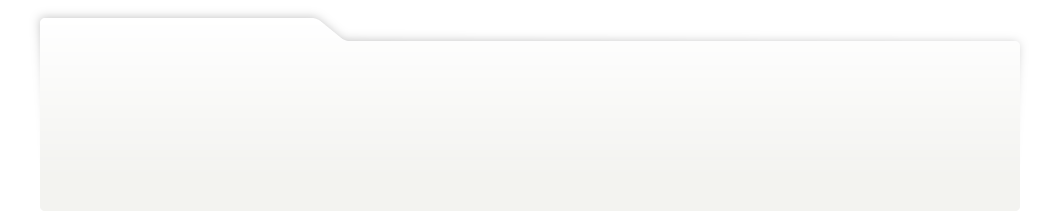
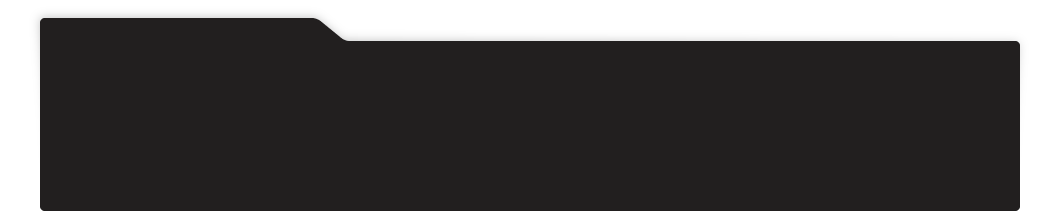
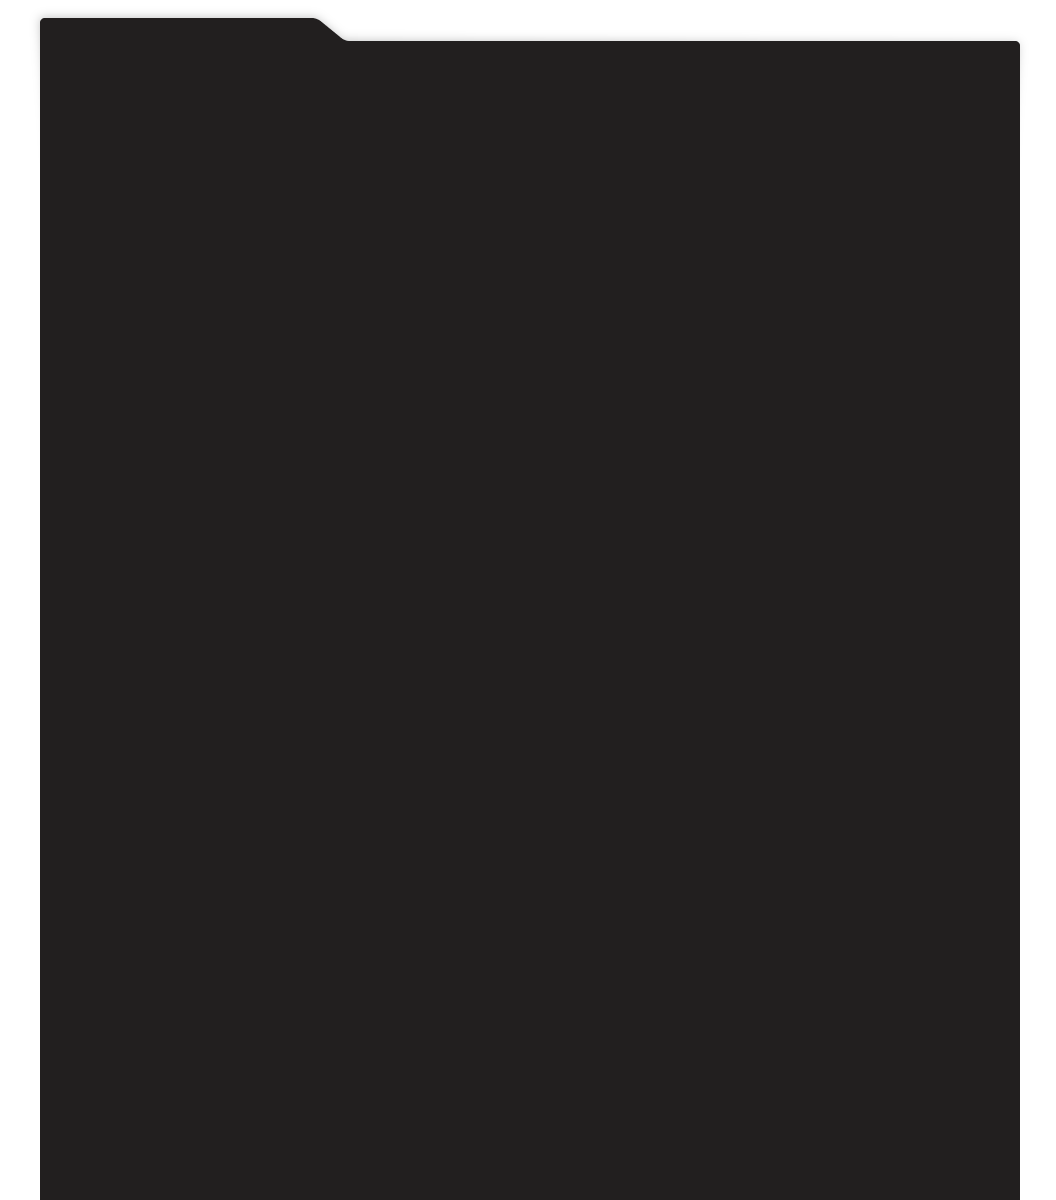
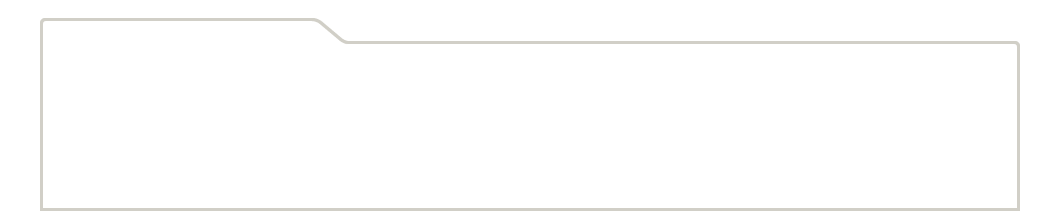
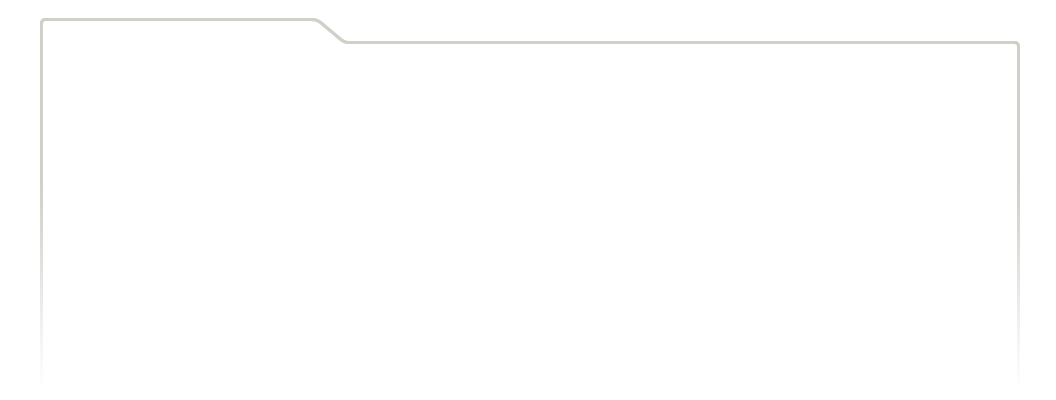
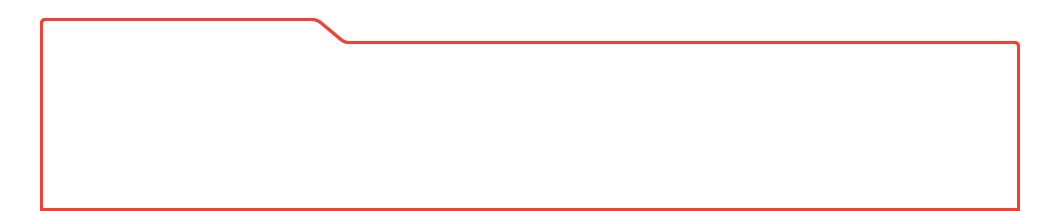
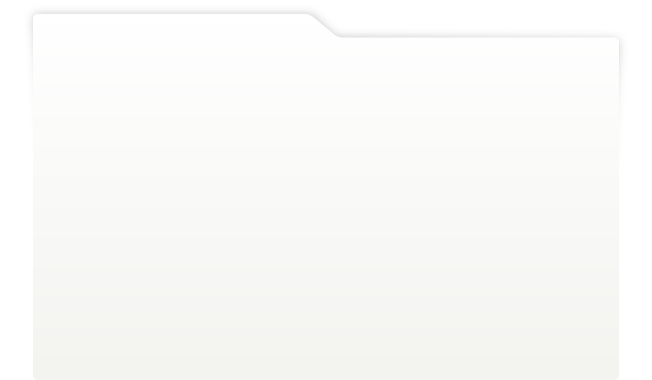
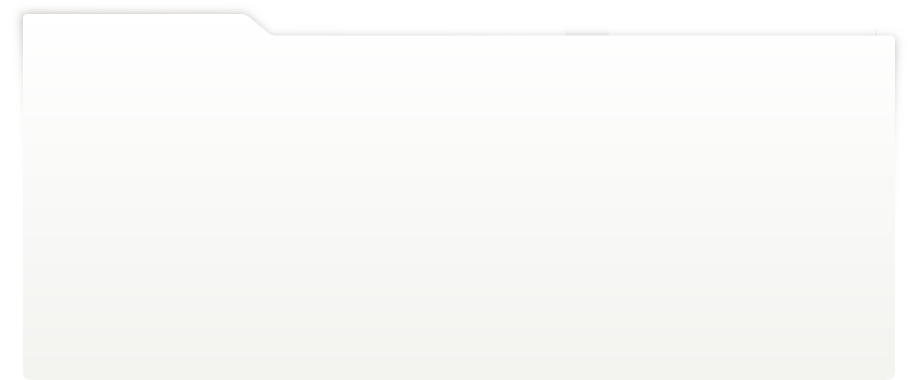
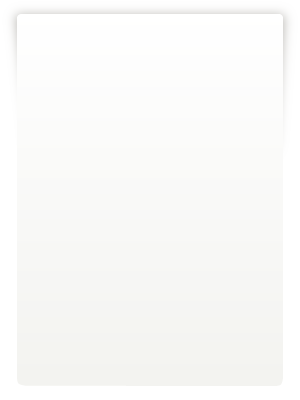
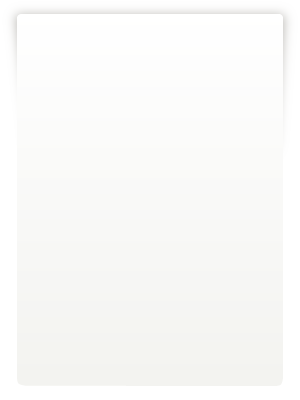
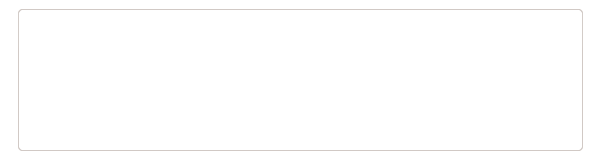
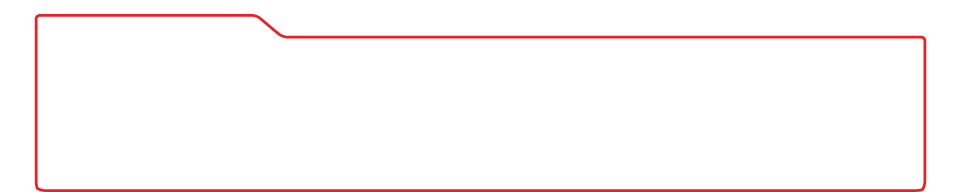
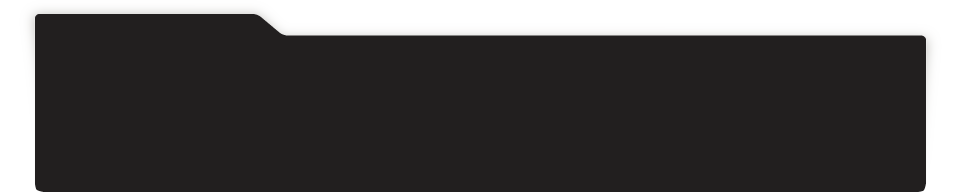
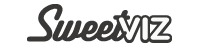
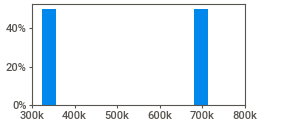
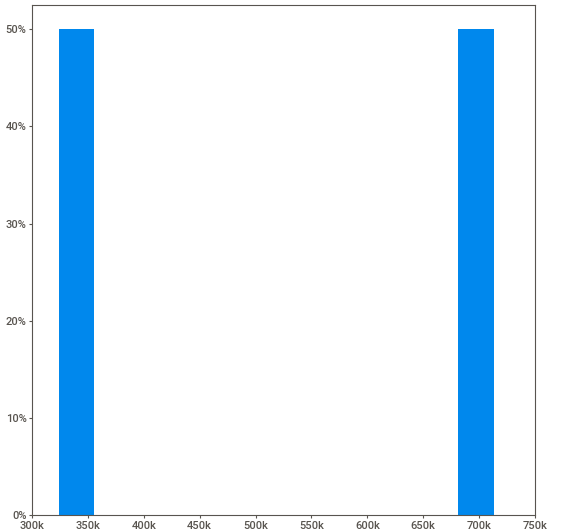
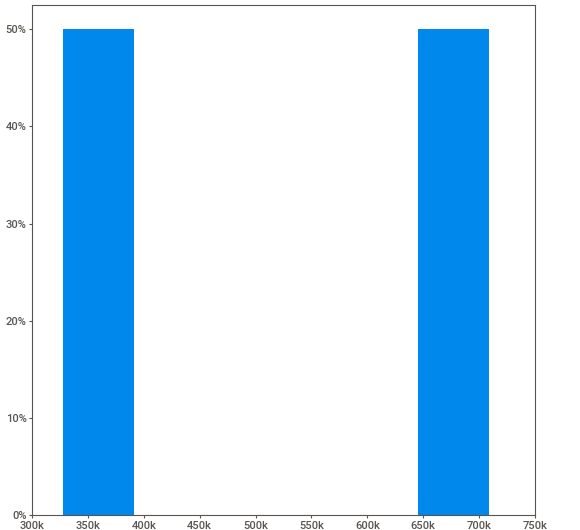
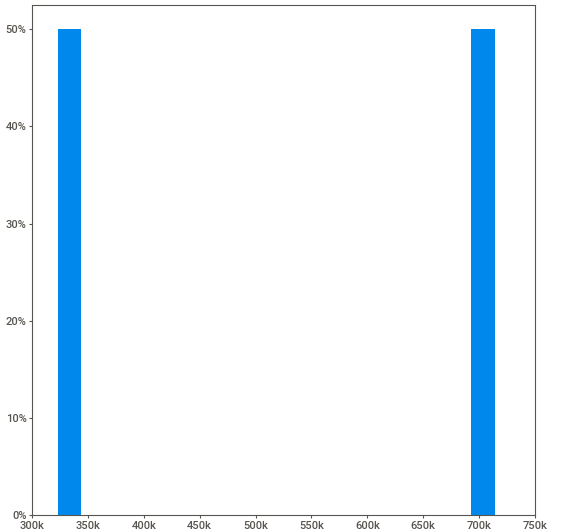
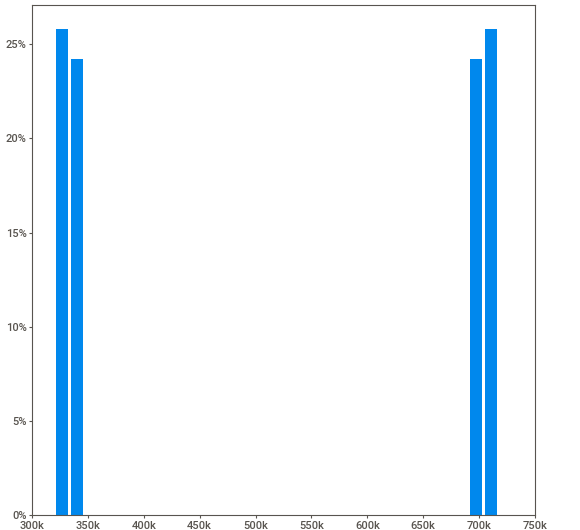
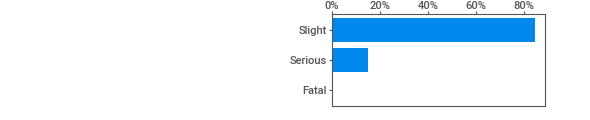
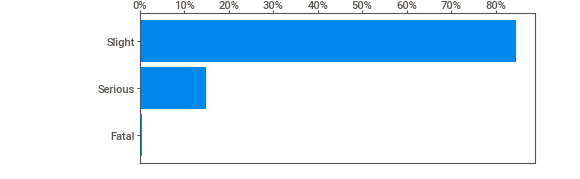
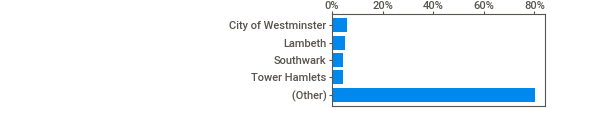
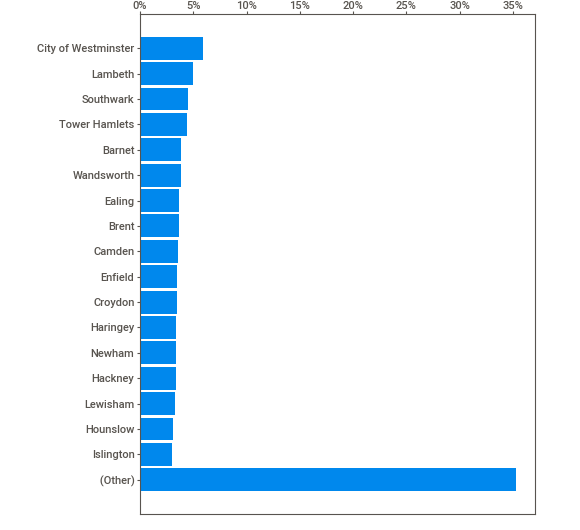
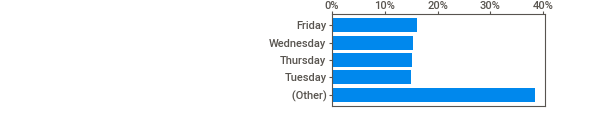
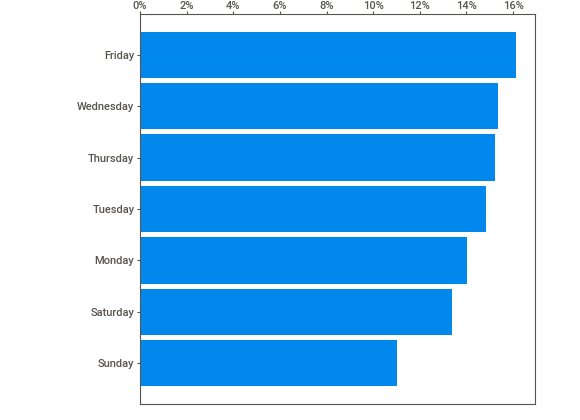
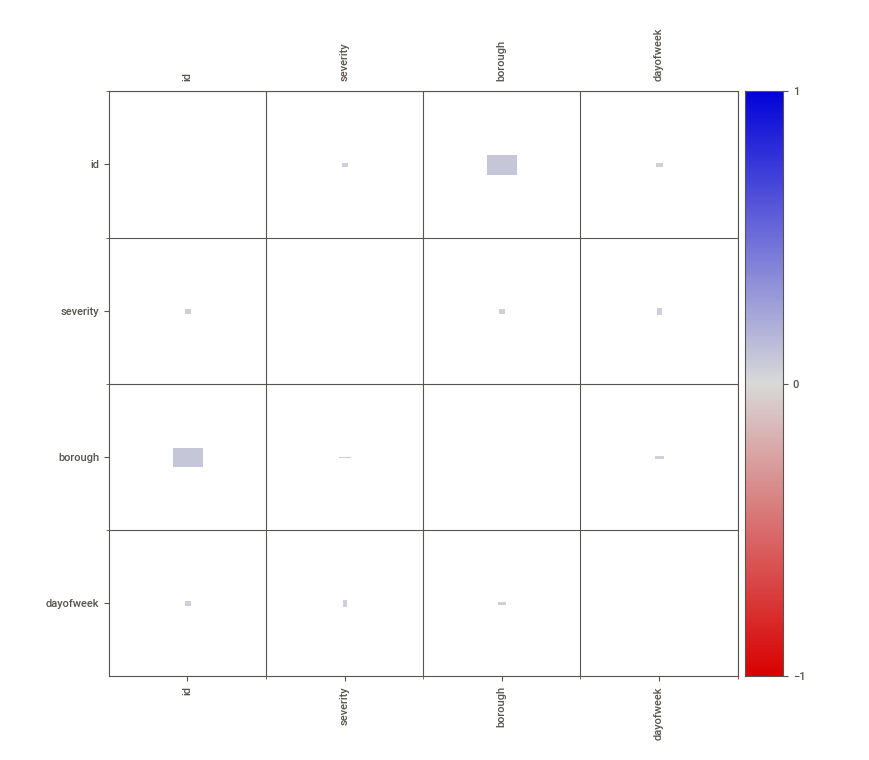
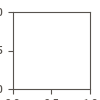

In [69]:
my_report = sv.analyze(df_2018)
my_report.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Proportion of accidents by severity

In [70]:
df_2018['severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [71]:
fatal_mean_2018 = (df_2018['severity'] == 'Fatal').mean()
fatal_mean_2018

0.004251667511799353

In [72]:
serious_mean_2018 = (df_2018['severity'] == 'Serious').mean()
serious_mean_2018

0.14931544252447634

In [73]:
slight_mean_2018 = (df_2018['severity'] == 'Slight').mean()
slight_mean_2018

0.8464328899637243

In [74]:
severity_ratios_2018 = [fatal_mean_2018, serious_mean_2018, slight_mean_2018]
severity_ratios_2018

[0.004251667511799353, 0.14931544252447634, 0.8464328899637243]

# Counts of accidents per borough

In [75]:
accidents_by_borough_2018 = df_2018['borough'].value_counts().rename_axis('accidents_by_borough').to_frame('counts')
accidents_by_borough_2018

counts
accidents_by_borough          
City of Westminster       3020
Lambeth                   2574
Southwark                 2300
Tower Hamlets             2260
Barnet                    1986
Wandsworth                1968
Ealing                    1890
Brent                     1862
Camden                    1822
Enfield                   1784
Croydon                   1782
Haringey                  1714
Newham                    1712
Hackney                   1710
Lewisham                  1672
Hounslow                  1572
Islington                 1536
Redbridge                 1514
Bromley                   1474
Hillingdon                1450
Greenwich                 1430
Waltham Forest            1424
Hammersmith and Fulham    1414
Kensington and Chelsea    1366
Barking and Dagenham      1164
Havering                  1148
Merton                     994
Bexley                     972
Richmond upon Thames       888
Harrow                     828
Sutton                     814
Kingston                   662
City of London             568

# Fatal accidents by borough 

In [76]:
fatal_2018 = df_2018[df_2018['severity'] == 'Fatal']
fatal_2018

id                                           location  \
193    325721   Plumstead Common Road junction with Vernham Road   
198    325726      John Wilson Street junction with Castile Road   
344    323304           Goswell Road junction with Percival Road   
1034   325859  Romney Road 30 metres south of junction with P...   
1052   325877  Woolwich Road Se18 junction with A2 Flyover- n...   
...       ...                                                ...   
50385  701295  Queens Circus Roundabout junction with Prince ...   
50451  701361           Falcon Road junction with St John's Hill   
50711  701621  Werter Road 32 metres east of junction with Pu...   
50782  701692        Roehampton Lane junction with Woodmill Road   
50882  701792  Fulham Road Outside 488 30 metres south west o...   

                           date severity                 borough  dayofweek  
193   2018-02-12 08:10:00+00:00    Fatal               Greenwich     Monday  
198   2018-02-15 14:52:00+00:00    Fatal               Greenwich   Thursday  
344   2018-07-06 00:18:00+00:00    Fatal               Islington     Friday  
1034  2018-05-09 16:32:00+00:00    Fatal               Greenwich  Wednesday  
1052  2018-05-18 08:25:00+00:00    Fatal               Greenwich     Friday  
...                         ...      ...                     ...        ...  
50385 2018-07-09 17:40:00+00:00    Fatal              Wandsworth     Monday  
50451 2018-07-27 10:36:00+00:00    Fatal              Wandsworth     Friday  
50711 2018-11-07 09:42:00+00:00    Fatal              Wandsworth  Wednesday  
50782 2018-12-04 14:57:00+00:00    Fatal              Wandsworth    Tuesday  
50882 2018-01-25 10:59:00+00:00    Fatal  Hammersmith and Fulham   Thursday  

[218 rows x 6 columns]

In [77]:
fatal_accident_2018 = fatal_2018.groupby('borough').count()['severity'].rename_axis('Fatal_accident_per_borough').to_frame('Total')
fatal_accident_2018

Total
Fatal_accident_per_borough       
Barking and Dagenham            2
Barnet                          8
Bexley                          6
Brent                          10
Bromley                         6
Camden                         10
City of London                  2
City of Westminster             6
Croydon                         8
Ealing                         10
Enfield                        16
Greenwich                      16
Hackney                         4
Hammersmith and Fulham          2
Haringey                        4
Havering                        6
Hillingdon                      8
Hounslow                        4
Islington                       4
Kensington and Chelsea          6
Kingston                        4
Lambeth                         2
Lewisham                       12
Merton                          6
Newham                         10
Redbridge                       2
Richmond upon Thames            4
Southwark                       4
Sutton                          6
Tower Hamlets                   4
Waltham Forest                 14
Wandsworth                     12

In [78]:
fatal_accident_2018 = fatal_accident_2018.sort_values(by='Total', ascending=False)
fatal_accident_2018 = fatal_accident_2018[:5]

In [79]:
fatal_accident_2018

Total
Fatal_accident_per_borough       
Enfield                        16
Greenwich                      16
Waltham Forest                 14
Wandsworth                     12
Lewisham                       12

In [80]:
first_borough_2018 = (fatal_2018['borough'] == 'Enfield').mean()
first_borough_2018

0.07339449541284404

In [81]:
second_borough_2018 = (fatal_2018['borough'] == 'Greenwich').mean()
second_borough_2018

0.07339449541284404

In [82]:
third_borough_2018 = (fatal_2018['borough'] == 'Waltham Forest').mean()
third_borough_2018

0.06422018348623854

In [83]:
fourth_borough_2018 = (fatal_2018['borough'] == 'Wandsworth').mean()
fourth_borough_2018

0.05504587155963303

In [84]:
fifth_borough_2018 = (fatal_2018['borough'] == 'Lewisham').mean()
fifth_borough_2018

0.05504587155963303

In [85]:
fatal_ratios_2018 = [first_borough_2018, second_borough_2018, third_borough_2018, fourth_borough_2018, fifth_borough_2018]
fatal_ratios_2018

[0.07339449541284404,
 0.07339449541284404,
 0.06422018348623854,
 0.05504587155963303,
 0.05504587155963303]

# Proportion Visualization 

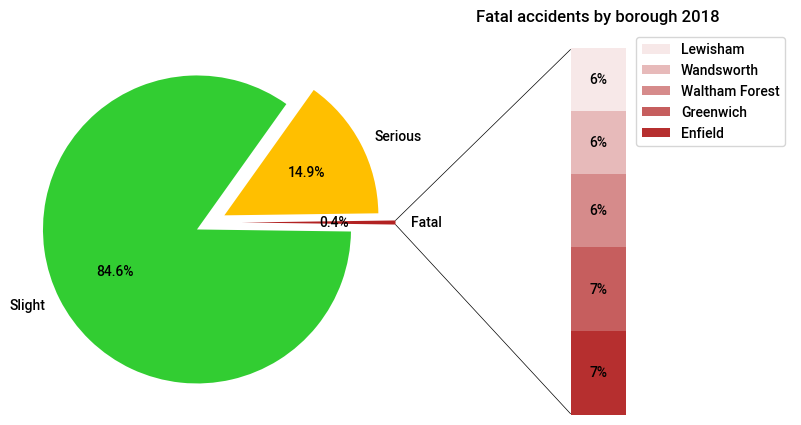

In [92]:
# make figure and assign axis objects

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters

severity_ratios_2018 = severity_ratios_2018
severity_labels_2018 = ['Fatal', 'Serious', 'Slight']
explode = [0.2, 0.1, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * severity_ratios_2018[0]
wedges, *_ = ax1.pie(severity_ratios_2018, autopct='%1.1f%%', startangle=angle,
                     labels=severity_labels_2018, explode=explode, colors=['firebrick', '#ffbf00', 'limegreen'], 
                     textprops={'fontsize': 10})

# bar chart parameters
fatal_ratios_2018 = fatal_ratios_2018
borough_labels_2018 = ['Enfield', 'Greenwich', 'Waltham Forest', 'Wandsworth', 'Lewisham']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(fatal_ratios_2018, borough_labels_2018)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='firebrick', label=label,
                 alpha=0.1 + 0.21 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Fatal accidents by borough 2018')
ax2.legend(loc='upper right')
ax2.axis('off')
ax2.set_xlim(- 3.5 * width, 3.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(fatal_ratios_2018)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, .999), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(.5)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, .68), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(.5)

#plt.savefig('fatal_2018')
plt.show()

# 2011 Data

In [148]:
url_2011 = 'https://api.tfl.gov.uk/AccidentStats/2011'

In [149]:
req_2011 = requests.get(url_2011)
req_2011

<Response [200]>

In [150]:
json_2011_data = req_2011.json()
json_2011_data 

[{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities',
  'id': 147461,
  'lat': 51.536859,
  'lon': -0.142564,
  'location': 'Arlington Road junction with Delancey Street',
  'date': '2011-09-10T15:55:00Z',
  'severity': 'Slight',
  'borough': 'Camden',
  'casualties': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities',
    'class': 'Pedestrian',
    'severity': 'Slight',
    'mode': 'Pedestrian',
    'ageBand': 'Unknown'}],
  'vehicles': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
    'type': 'Car'}]},
 {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities',
  'id': 147462,
  'lat': 51.523009,
  'lon': -0.136785,
  'location': 'Tottenham Court Road junction with University Street.',
  'date': '2011-09-10T19:00:00Z',
  'severity': 'Slight',
  'borough': 'Camden',
  'casualties': [{'$type': 'Tfl

In [151]:
json_2011_data[0].keys()

dict_keys(['$type', 'id', 'lat', 'lon', 'location', 'date', 'severity', 'borough', 'casualties', 'vehicles'])

In [152]:
df_2011 = pd.DataFrame(json_2011_data, columns=['id', 'location', 'date', 'severity', 'borough'])
df_2011

id                                           location  \
0      147461       Arlington Road junction with Delancey Street   
1      147462  Tottenham Court Road junction with University ...   
2      147463            Euston Road junction with Euston Square   
3      147464            North End Way junction with Sandy Road.   
4      147465          Chalton Street junction with Phoenix Road   
...       ...                                                ...   
48881  152830  Glengall Road 40 metres north of Glengall Terrace   
48882  152831    New Kent Road junction with Elephant And Castle   
48883  152832  Elephant & Castle roundabout 20 metres south e...   
48884  152833           Wild's Rents junction with Decima Street   
48885  152834  Southwark Street junction with Great Guildford...   

                       date severity    borough  
0      2011-09-10T15:55:00Z   Slight     Camden  
1      2011-09-10T19:00:00Z   Slight     Camden  
2      2011-09-10T00:20:00Z   Slight     Camden  
3      2011-09-11T04:53:00Z   Slight     Camden  
4      2011-09-10T08:50:00Z   Slight     Camden  
...                     ...      ...        ...  
48881  2011-12-04T11:19:00Z   Slight  Southwark  
48882  2011-11-27T06:00:00Z  Serious  Southwark  
48883  2011-11-23T16:10:00Z   Slight  Southwark  
48884  2011-11-11T17:11:00Z   Slight  Southwark  
48885  2011-11-21T08:47:00Z   Slight  Southwark  

[48886 rows x 5 columns]

In [153]:
df_2011.duplicated().sum()

0

# Proportion of accidents by severity

In [154]:
df_2011['severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [155]:
fatal_mean_2011 = (df_2011['severity'] == 'Fatal').mean()
fatal_mean_2011

0.006341283803133821

In [156]:
serious_mean_2011 = (df_2011['severity'] == 'Serious').mean()
serious_mean_2011

0.10411978889661662

In [157]:
slight_mean_2011 = (df_2011['severity'] == 'Slight').mean()
slight_mean_2011

0.8895389273002495

In [158]:
severity_ratios_2011 = [fatal_mean_2011, serious_mean_2011, slight_mean_2011]
severity_ratios_2011

[0.006341283803133821, 0.10411978889661662, 0.8895389273002495]

# Counts of accidents per borough

In [159]:
accidents_by_borough_2011 = df_2011['borough'].value_counts().rename_axis('accidents_by_borough').to_frame('counts')
accidents_by_borough_2011

counts
accidents_by_borough          
City of Westminster       2912
Lambeth                   2234
Barnet                    2226
Southwark                 1984
Croydon                   1932
Wandsworth                1902
Lewisham                  1780
Tower Hamlets             1766
Islington                 1706
Enfield                   1690
Camden                    1690
Ealing                    1650
Hackney                   1602
Hounslow                  1576
Brent                     1522
Hillingdon                1500
Greenwich                 1496
Newham                    1478
Haringey                  1478
Redbridge                 1460
Kensington and Chelsea    1430
Bromley                   1400
Hammersmith and Fulham    1340
Waltham Forest            1324
Havering                  1214
Barking and Dagenham       952
Richmond upon Thames       918
Bexley                     908
Sutton                     814
Merton                     806
Kingston                   752
Harrow                     734
City of London             710

# Fatal accidents by borough

In [160]:
fatal_2011= df_2011[df_2011['severity'] == 'Fatal']
fatal_2011

id                                           location  \
483    157889  Eastern Avenue 86 metres north east of junctio...   
484    157890  Redbridge Lane east junction with Ellesmere Ga...   
1078   163105  Petersham Road 99 metres south east of junctio...   
1079   163106        Chertsey Road junction with Marlow Crescent   
1850   147872           Camden Road junction with St Pancras Way   
...       ...                                                ...   
46270  531306  Sidcup By-Pass 407 metres south west of juncti...   
47213  151162  A2 1.5Km's east of junction with westhorne Avenue   
47214  151163            Sidcup Road junction with west Hallowes   
48103  152052  Lewisham High Street junction with Molesworth ...   
48104  152053       New Cross Road junction with Jerningham Road   

                       date severity               borough  
483    2011-01-01T15:55:00Z    Fatal             Redbridge  
484    2011-03-06T00:58:00Z    Fatal             Redbridge  
1078   2011-04-21T11:54:00Z    Fatal  Richmond upon Thames  
1079   2011-05-14T21:38:00Z    Fatal  Richmond upon Thames  
1850   2011-04-05T15:18:00Z    Fatal                Camden  
...                     ...      ...                   ...  
46270  2011-07-17T15:45:00Z    Fatal                Bexley  
47213  2011-04-21T06:04:00Z    Fatal             Greenwich  
47214  2011-11-02T14:56:00Z    Fatal             Greenwich  
48103  2011-03-03T20:43:00Z    Fatal              Lewisham  
48104  2011-10-24T01:10:00Z    Fatal              Lewisham  

[310 rows x 5 columns]

In [161]:
fatal_accident_2011 = fatal_2011.groupby('borough').count()['severity'].rename_axis('Fatal_accident_per_borough').to_frame('Total')
fatal_accident_2011

Total
Fatal_accident_per_borough       
Barking and Dagenham            8
Barnet                         16
Bexley                         10
Brent                           6
Bromley                        12
Camden                         12
City of Westminster            12
Croydon                        18
Ealing                         10
Enfield                        24
Greenwich                       4
Hackney                         6
Hammersmith and Fulham          6
Haringey                        8
Harrow                          6
Havering                       16
Hillingdon                     10
Hounslow                       14
Islington                       8
Kensington and Chelsea         10
Kingston                        4
Lambeth                        20
Lewisham                        4
Merton                          2
Newham                          6
Redbridge                       4
Richmond upon Thames            4
Southwark                      10
Sutton                          8
Tower Hamlets                  16
Waltham Forest                  8
Wandsworth                      8

In [162]:
fatal_accident_2011 = fatal_accident_2011.sort_values(by='Total', ascending=False)
fatal_accident_2011 = fatal_accident_2011[:5]
fatal_accident_2011

Total
Fatal_accident_per_borough       
Enfield                        24
Lambeth                        20
Croydon                        18
Barnet                         16
Havering                       16

In [163]:
first_borough_2011 = (fatal_2011['borough'] == 'Enfield').mean()
first_borough_2011

0.07741935483870968

In [164]:
second_borough_2011 = (fatal_2011['borough'] == 'Lambeth').mean()
second_borough_2011

0.06451612903225806

In [167]:
third_borough_2011 = (fatal_2011['borough'] == 'Croydon').mean()
third_borough_2011

0.05806451612903226

In [168]:
fourth_borough_2011 = (fatal_2011['borough'] == 'Barnet').mean()
fourth_borough_2011

0.05161290322580645

In [170]:
fifth_borough_2011 = (fatal_2011['borough'] == 'Havering').mean()
fifth_borough_2011

0.05161290322580645

In [171]:
fatal_ratios_2011 = [first_borough_2011, second_borough_2011, third_borough_2011, fourth_borough_2011, fifth_borough_2011]
fatal_ratios_2011

[0.07741935483870968,
 0.06451612903225806,
 0.05806451612903226,
 0.05161290322580645,
 0.05161290322580645]

# Proportion Visualization

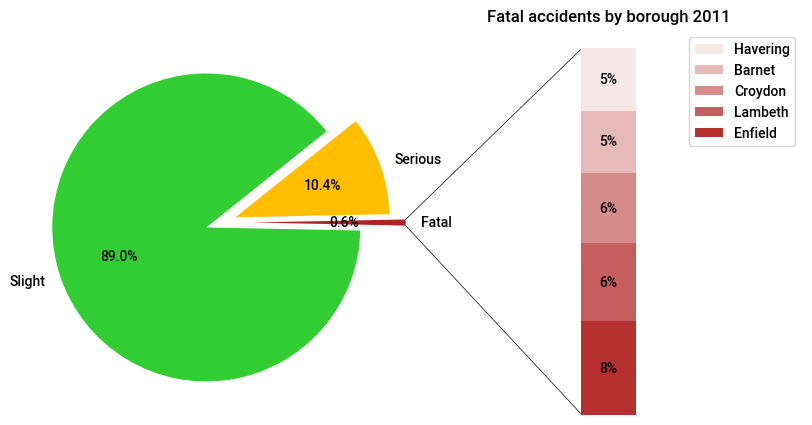

In [175]:
# make figure and assign axis objects

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters

severity_ratios_2011 = severity_ratios_2011
severity_labels_2011 = ['Fatal', 'Serious', 'Slight']
explode = [0.2, 0.1, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * severity_ratios_2011[0]
wedges, *_ = ax1.pie(severity_ratios_2011, autopct='%1.1f%%', startangle=angle,
                     labels=severity_labels_2011, explode=explode, colors=['firebrick', '#ffbf00', 'limegreen'], 
                     textprops={'fontsize': 10})

# bar chart parameters
fatal_ratios_2011 = fatal_ratios_2011
borough_labels_2011 = ['Enfield', 'Lambeth', 'Croydon', 'Barnet', 'Havering']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(fatal_ratios_2011, borough_labels_2011)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='firebrick', label=label,
                 alpha=0.1 + 0.21 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Fatal accidents by borough 2011')
ax2.legend(loc='upper right')
ax2.axis('off')
ax2.set_xlim(- 3.5 * width, 3.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(fatal_ratios_2018)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, .999), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(.5)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, .698), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(.5)

#plt.savefig('fatal_2018')
plt.show()

# Reserve codes

In [ ]:
reserve = pd.json_normalize(json_data, 'casualties', ['id', 'location', 'date', 'severity', 'borough'], record_prefix=".")